<a href="https://colab.research.google.com/github/bambithenambi/MechOptimization/blob/main/AccelerationDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from numba import jit, njit, vectorize

# Constants

In [13]:
Hg = 4
Ht = 5
Hs = 0.5
g = 9.81
Dt = 7
angles = np.arange(1.0, 90.0, 0.001)

# Different Types of Functions #

## Numba Vectorized ##

In [14]:
@vectorize
def angleToVelocity(angle):
  return math.sqrt(((Hg+Ht)/2-Hs)/(Dt*math.tan(angle*math.pi/180)+(g/2)))*g/math.sin(angle*math.pi/180)

In [36]:
%time angleToVelocity(angles)

CPU times: user 7.5 ms, sys: 45 µs, total: 7.55 ms
Wall time: 11.5 ms


array([5.01396423e+02, 5.00889490e+02, 5.00383569e+02, ...,
       5.36588461e-02, 4.38125322e-02, 3.09803281e-02])

## Python Iteration ##

In [30]:
def original_function(angles):
  velocity = []
  for i in angles:
    velocity.append(angleToVelocity(i))

In [37]:
%time original_function(angles)

CPU times: user 136 ms, sys: 4.53 ms, total: 140 ms
Wall time: 141 ms


## Numba NJIT ##

In [43]:
jitted_function = njit()(original_function)

In [40]:
%time result=jitted_function(angles)

CPU times: user 9.09 ms, sys: 2.97 ms, total: 12.1 ms
Wall time: 13.4 ms


## Numpy User-defined ufunc ##

In [7]:
analyze = np.frompyfunc(angleToVelocity, 1, 1)

In [38]:
%time analyze(angles)

CPU times: user 69.4 ms, sys: 0 ns, total: 69.4 ms
Wall time: 74.2 ms


array([501.39642286578317, 500.88948997905544, 500.3835692020646, ...,
       0.05365884605721635, 0.04381253223306089, 0.030980328137087048],
      dtype=object)

# Result plotted with vectorized function #

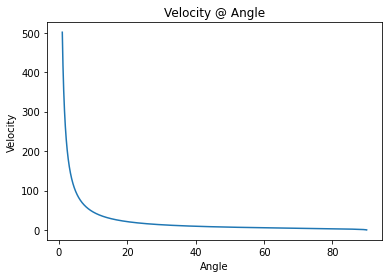

<Figure size 720x720 with 0 Axes>

[5.01396423e+02 5.00889490e+02 5.00383569e+02 ... 5.36588461e-02
 4.38125322e-02 3.09803281e-02]


In [46]:
result=angleToVelocity(angles)
plt.plot(angles, result)
plt.title('Velocity @ Angle')
plt.xlabel('Angle')
plt.ylabel('Velocity')
plt.figure(figsize=(10, 10))
plt.show()
print(result)